# Tugas Hands-On 2
oleh Muhammad Ghiffari Iskandar - 122140189

## Soal 1 - Simulasi Sinyal PPG

### a. Buktikanlah bahwa proses downsampling pada sinyal PPG akan menghilangkan informasi dari sinyal asi. Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat `Aliasing` pada sinyal hasil downsampling. Jelaskan apa itu `Aliasing`


In [1]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import decimate, resample

Skipping random IBI modulation, since the offset_weight 0.89 leads to physiologically implausible wave durations of 74.2499999999997 milliseconds.


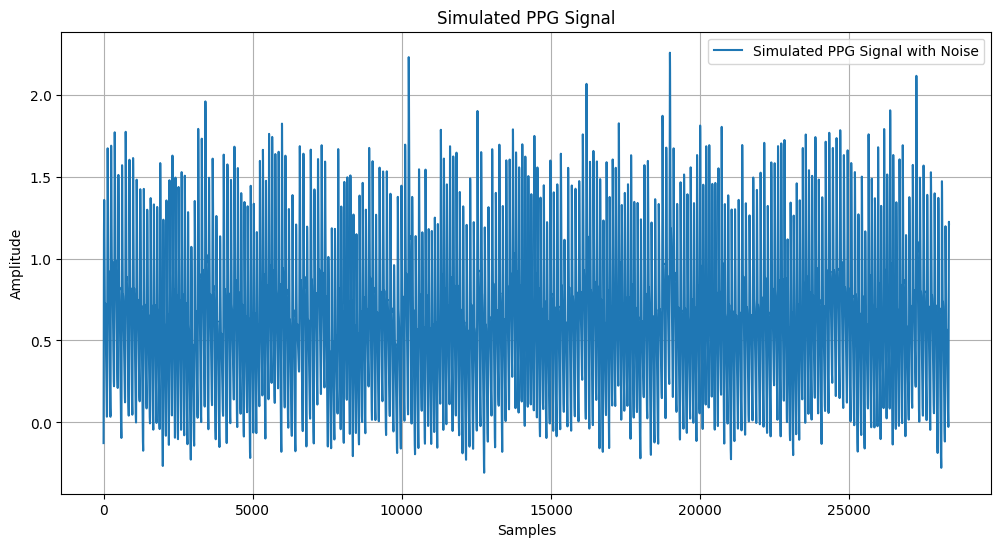

In [2]:
# Prompting "buatkan kode program simulasi sinyal PPG menggunakan 
# library neurokit2.ppg_simulate dengan ketentuan berikut: Durasi 
# 189 sekon, sampling rate 150 Hz, Noise level 0.89, Heart rate 80 
# BPM, Random state 260504"

# Simulate PPG signal
ppg = nk.ppg_simulate(duration=189,         # Durasi dalam detik
                     sampling_rate=150,     # Sampling rate dalam Hz
                     ibi_randomness=0.89,   # Noise level
                     heart_rate=80,         # Heart rate dalam beats per minute
                     random_state=260504)   # Random state

# Plot the simulated PPG signal
plt.figure(figsize=(12, 6))
plt.plot(ppg, label='Simulated PPG Signal with Noise')
plt.title('Simulated PPG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

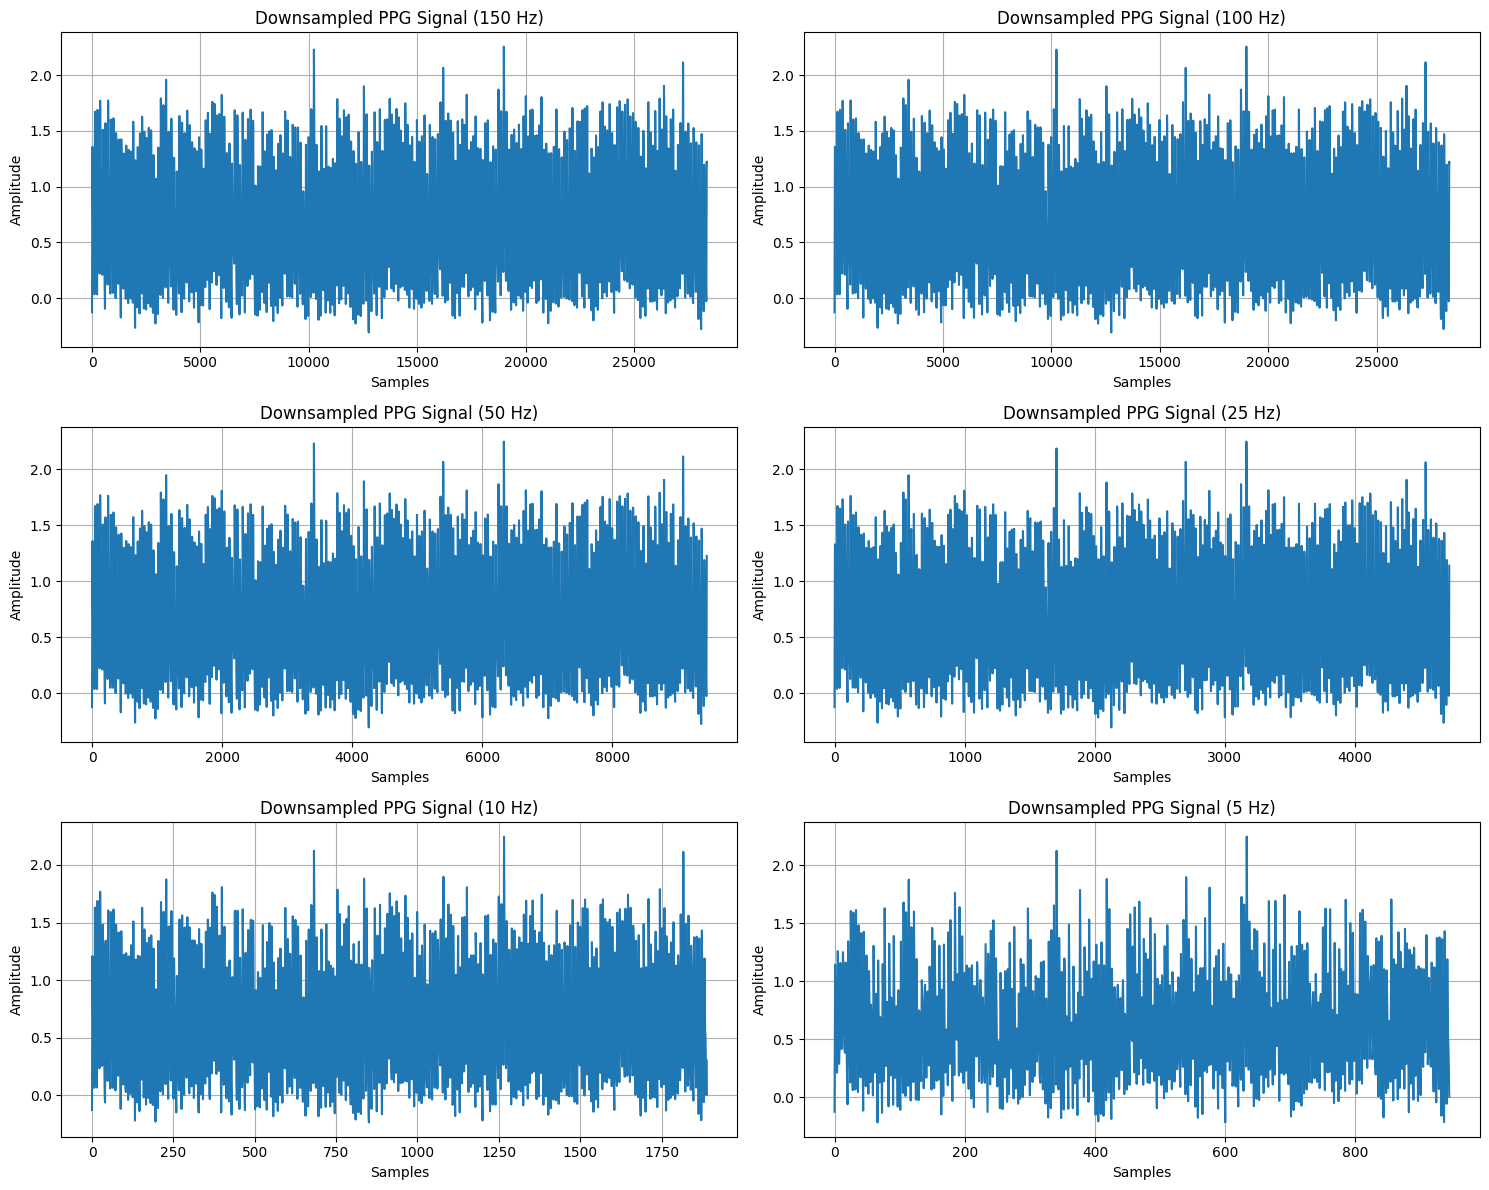

In [3]:
# Create downsampling factors
original_sr = 150
target_srs = [150, 100, 50, 25, 10, 5]

# Create subplots
plt.figure(figsize=(15, 12))

for i, target_sr in enumerate(target_srs, 1):
    # Calculate downsample factor
    downsample_factor = original_sr // target_sr
    
    # Downsample the signal
    ppg_downsampled = ppg[::downsample_factor]
    
    # Plot
    plt.subplot(3, 2, i)
    plt.plot(ppg_downsampled)
    plt.title(f'Downsampled PPG Signal ({target_sr} Hz)')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


Berdasarkan 6 plot downscaling di atas, sinyal yang dihasilkan semakin memudar sampelnya atau terdistorsi dikarenakan berkurangnya sampel yang diambil melalui downscaling sehingga terjadi aliasing pada sinyal hasil. Aliasing merupakan fenomena sinyal yang disampling tidak cukup cepat sehingga hasil sampling terlihat memiliki frekuensi yang lebih rendah dari yang sebenarnya [ChatGPT]

[ChatGPT]: https://chatgpt.com/share/680820d1-ef48-8011-8812-1d5426654f02. 

Aliasing bisa digambarkan seperti ketidaklengkapan data pada sinyal setelah proses downsampling.

### b. Ketika kamu melakukan filtering, terdapat parameter `order` saat kamu melakukan filtering. Apa maksudnya dari `order` dan apa yang akan terjadi jika kamu mengganti nilai order terhadap sinyal?

order dalam filtering merupakan istilah yang merepresentasikan kompleksitas atau ketajaman dari sebuah metode filtering sinyal. Jika kita mengganti nilai order, maka pengaruh yang akan terjadi pada sinyal berupa cutoff sinyal pada frekuensi tertentu tergantung nilai orde yang ditetapkan. Semakin tinggi nilai orde, semakin presisi juga frekuensi yang dipotong atau dipisahkan dari data sinyal asli.

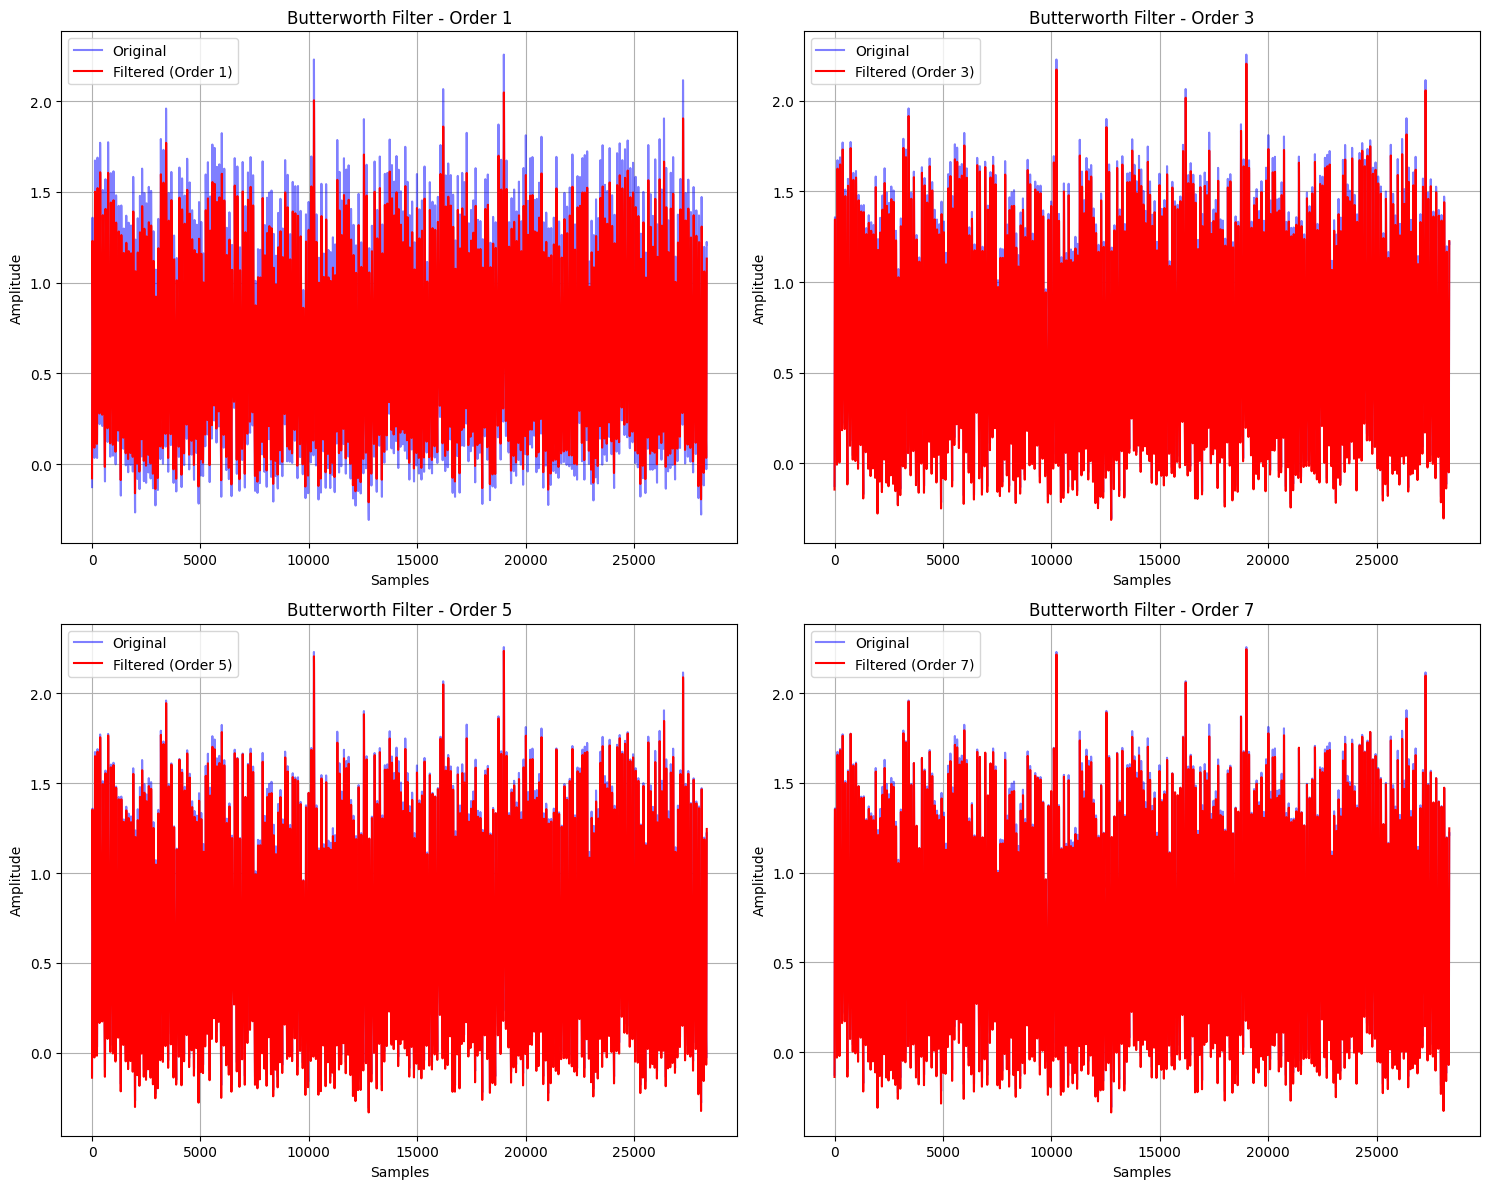

In [4]:
from scipy import signal

# Define filter parameters
nyquist = 150 / 2  # Nyquist frequency
cutoff = 5  # Cutoff frequency in Hz
orders = [1, 3, 5, 7]  # Different filter orders to compare

# Create subplots
plt.figure(figsize=(15, 12))

for i, order in enumerate(orders, 1):
    # Design Butterworth lowpass filter
    b, a = signal.butter(order, cutoff/nyquist, 'low')
    
    # Apply filter
    filtered_signal = signal.filtfilt(b, a, ppg)
    
    # Plot
    plt.subplot(2, 2, i)
    plt.plot(ppg, 'b-', alpha=0.5, label='Original')
    plt.plot(filtered_signal, 'r-', label=f'Filtered (Order {order})')
    plt.title(f'Butterworth Filter - Order {order}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Pada hasil plot berikut, setelah dilakukan filtering sinyal dengan nilai orde 1, 3, 5, dan 7, nilai orde yang diberikan sangat mempengaruhi bentuk sinyal. Menurut pendapat Copilot Model GPT-4o, semakin tinggi nilai order, maka pergeseran antara frekuensi yang dilewatkan dan yang diblokir menjadi semakin tajam sehingga filtering pada sinyal lebih selektif dalam memisahkan frekuensi yang diinginkan dan yang tidak.

![Screenshot Percakapan](media/copilot1.PNG)

## Soal 2 - Eksperimen Filter Band-Pass

2. Lakukan eksperimen dengan merancang filter band-pass menggunakan `signal.butter`. Pada sinyal respirasi (pernapasan). Generate sebuah signal dengan ketentuan:
    - Durasi: `Berdasarkan 3 digit terakhir nim anda`
    - Sampling Rate: `100 Hz`
    - Noise level: `0.<2 digit nim terakhir>`
    - `respiratory_rate`: `18` Breaths Per Minute (BPM)
    - `random_state`: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`

Anda dapat dengan bebas bereksperimen menentukan frekuensi cutoff yang diinginkan namun jelaskan latar belakang penentuan letak frekuensi cutoff mengapa anda memilih di nilai tersebut.

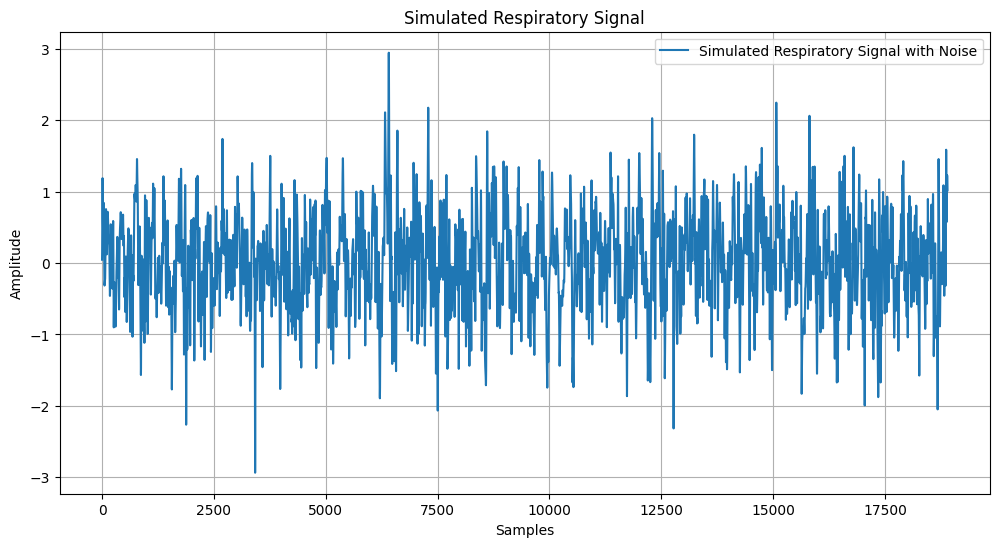

In [5]:
# Simulate respiratory signal
resp = nk.rsp_simulate(duration=189,         # Durasi dalam detik
                      sampling_rate=100,     # Sampling rate dalam Hz
                      noise=0.89,           # Noise level
                      respiratory_rate=18,   # Respiratory rate dalam breaths per minute
                      random_state=240526)   # Random state

# Plot the simulated respiratory signal
plt.figure(figsize=(12, 6))
plt.plot(resp, label='Simulated Respiratory Signal with Noise')
plt.title('Simulated Respiratory Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

Setelah membuat sinyal sesuai ketentuan, sekarang saya akan menerapkan filter band-pass pada sinyal tersebut.

In [6]:
# Define filter parameters
fs = 100  # sampling rate
lowcut = 0.1  # lower cutoff frequency for breathing (Hz)
highcut = 0.5  # upper cutoff frequency for breathing (Hz)
order = 1  # filter order

# Create bandpass filter
nyq = fs * 0.5  # Nyquist frequency
low = lowcut / nyq
high = highcut / nyq
b, a = signal.butter(order, [low, high], btype='band')

# Apply filter to get filtered signal
filtered_resp = signal.filtfilt(b, a, resp)

# Create time and frequency arrays
time = np.arange(len(resp)) / fs
freq = np.fft.fftfreq(len(resp), 1/fs)

# Calculate FFTs
fft_orig = np.abs(np.fft.fft(resp))
fft_filt = np.abs(np.fft.fft(filtered_resp))


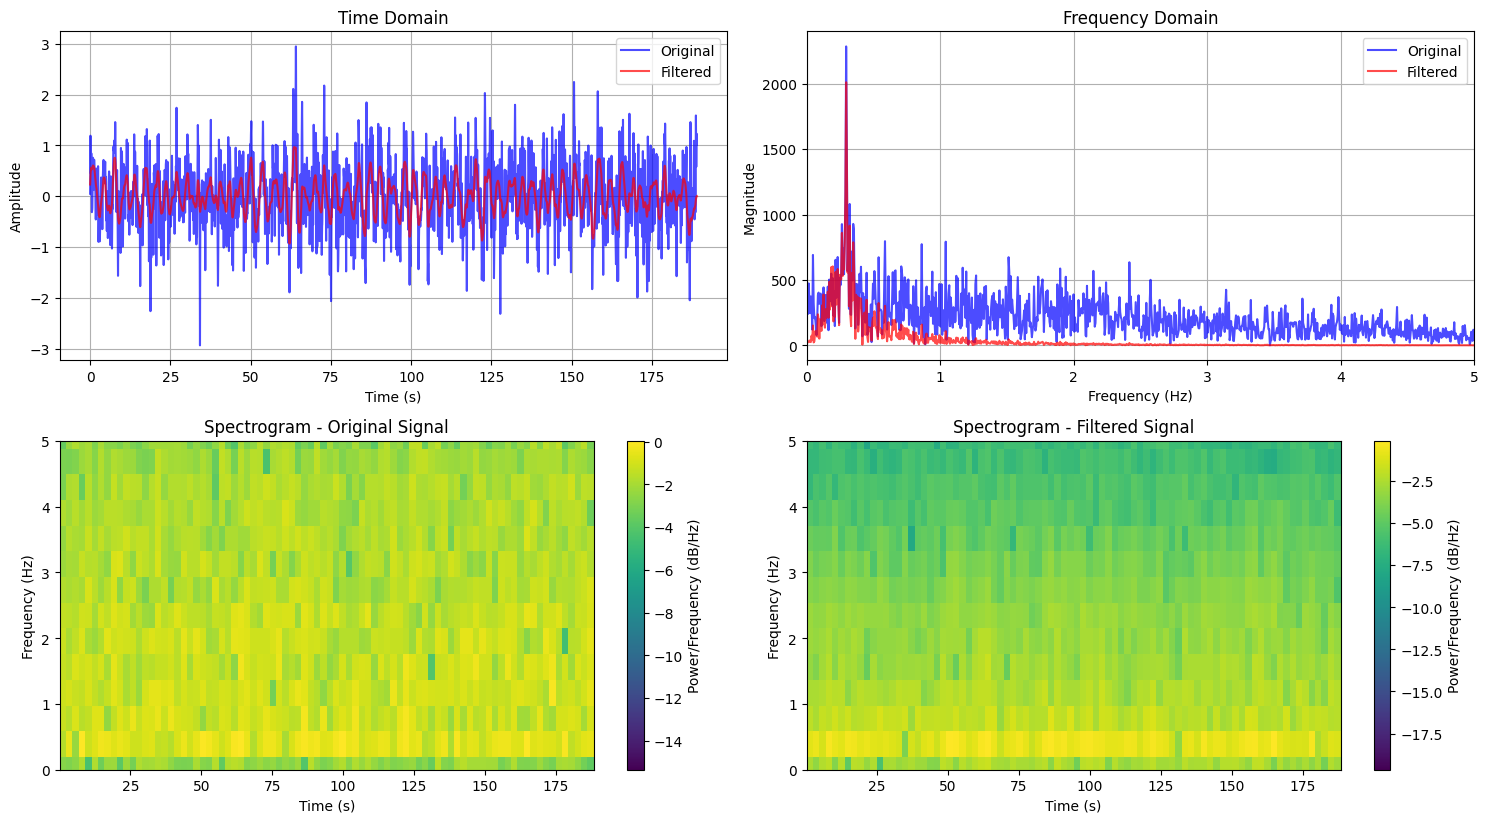

In [7]:
# Create subplot grid
fig = plt.figure(figsize=(15, 12))

# Time Domain Plot
plt.subplot(3, 2, 1)
plt.plot(time, resp, 'b-', label='Original', alpha=0.7)
plt.plot(time, filtered_resp, 'r-', label='Filtered', alpha=0.7)
plt.title('Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Frequency Domain Plot
plt.subplot(3, 2, 2)
mask = freq >= 0  # Only show positive frequencies
plt.plot(freq[mask], fft_orig[mask], 'b-', label='Original', alpha=0.7)
plt.plot(freq[mask], fft_filt[mask], 'r-', label='Filtered', alpha=0.7)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)  # Limit x-axis to focus on relevant frequencies

# Spectrogram of Original Signal
plt.subplot(3, 2, 3)
f, t, Sxx = signal.spectrogram(resp, fs=fs)
plt.pcolormesh(t, f, 1 * np.log10(Sxx))
plt.title('Spectrogram - Original Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylim(0, 5)

# Spectrogram of Filtered Signal
plt.subplot(3, 2, 4)
f, t, Sxx = signal.spectrogram(filtered_resp, fs=fs)
plt.pcolormesh(t, f, 1 * np.log10(Sxx))
plt.title('Spectrogram - Filtered Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

Pada umumnya, rata-rata frekuensi sinyal respirasi manusia berada di sekitar 0.1 Hz hingga 0.5 Hz sehingga saya menerapkan lowcut dan highcut di titik 0.1 dan 0.5 karena frekuensi sinyal dominan berada berkisar dari sekitar 0 sampai 0.5 yang ditampilkan pada grafik Frequency Domain berdasarakan sinyal respiratory. Pada perbandingan kedua spektogram diatas, setelah diterapkan band-pass pada frekuensi 0.1 dan 0.5, noise di luar sinyal respirasi dihapus dari sinyal sehingga kita mendapatkan sinyal yang mendekati frekuensi sinyal respirasi asli.

## Soal 3 - Filter Audio Sederhana

Kamu sedang mencoba membuat filter audio sederhana, maka kamu mencoba untuk merekam suara  audio menggunakan handphone / laptop dengan deskripsi berikut:
- Anda harus berbicara selama 20 detik.
- Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
- Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
- Lakukanlah proses filtering pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
- Visualisasikan spektrum frekuensi menggunakan FFT dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).

In [8]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment
from pydub.playback import play
import soundfile as sf

d:\Aa\Kuliah\Semester 6\Pengolahan Sinyal Digital R\IF3024-HO2\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


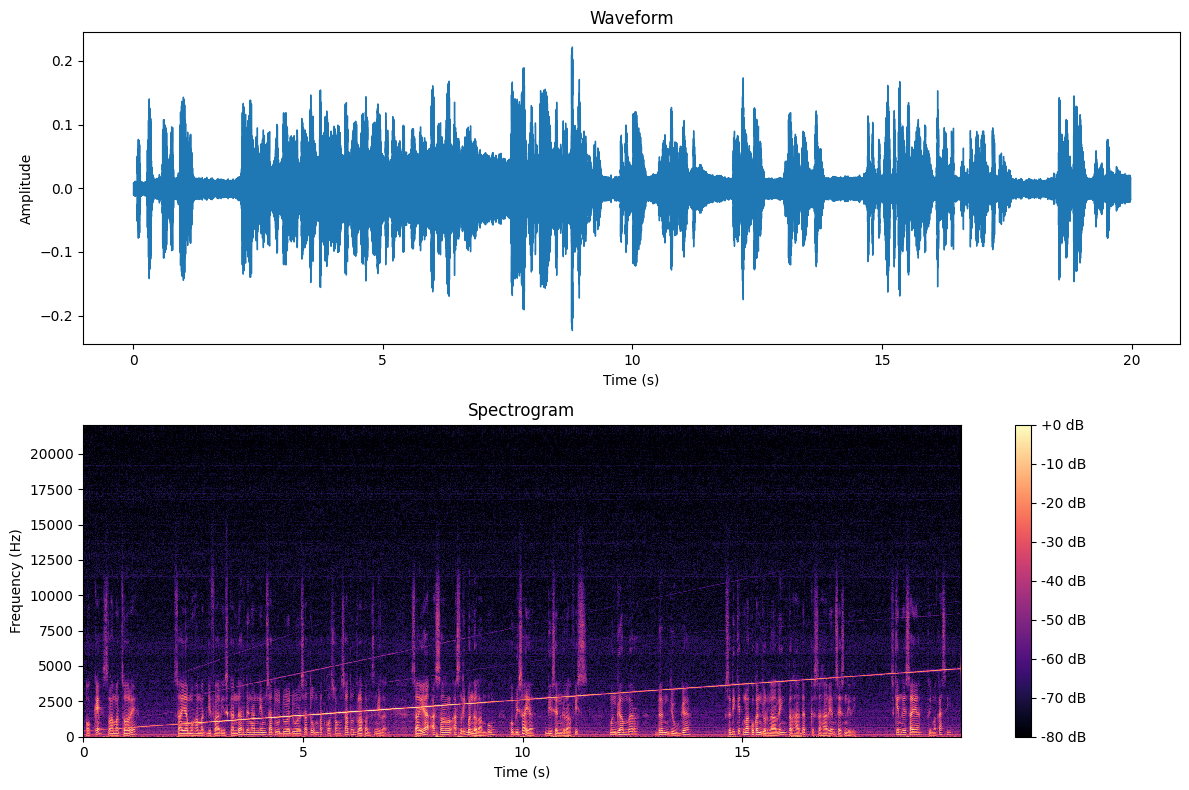

In [9]:
# Load the audio file
file_loc = os.path.join(os.getcwd(), 'media', 'rekaman_suara.wav')
y, sr = librosa.load(file_loc, sr=None)

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Plot waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

In [10]:
def band_pass_filter(audio_data, sr, lowcut=500, highcut=2000):
    
    # Create a bandpass Butterworth filter
    b, a = signal.butter(2, [lowcut, highcut], btype='band', fs=sr, output='ba')
    
    # Apply the filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply band pass filter to the audio
bpassed_audio = band_pass_filter(y, sr, lowcut=250, highcut=600)

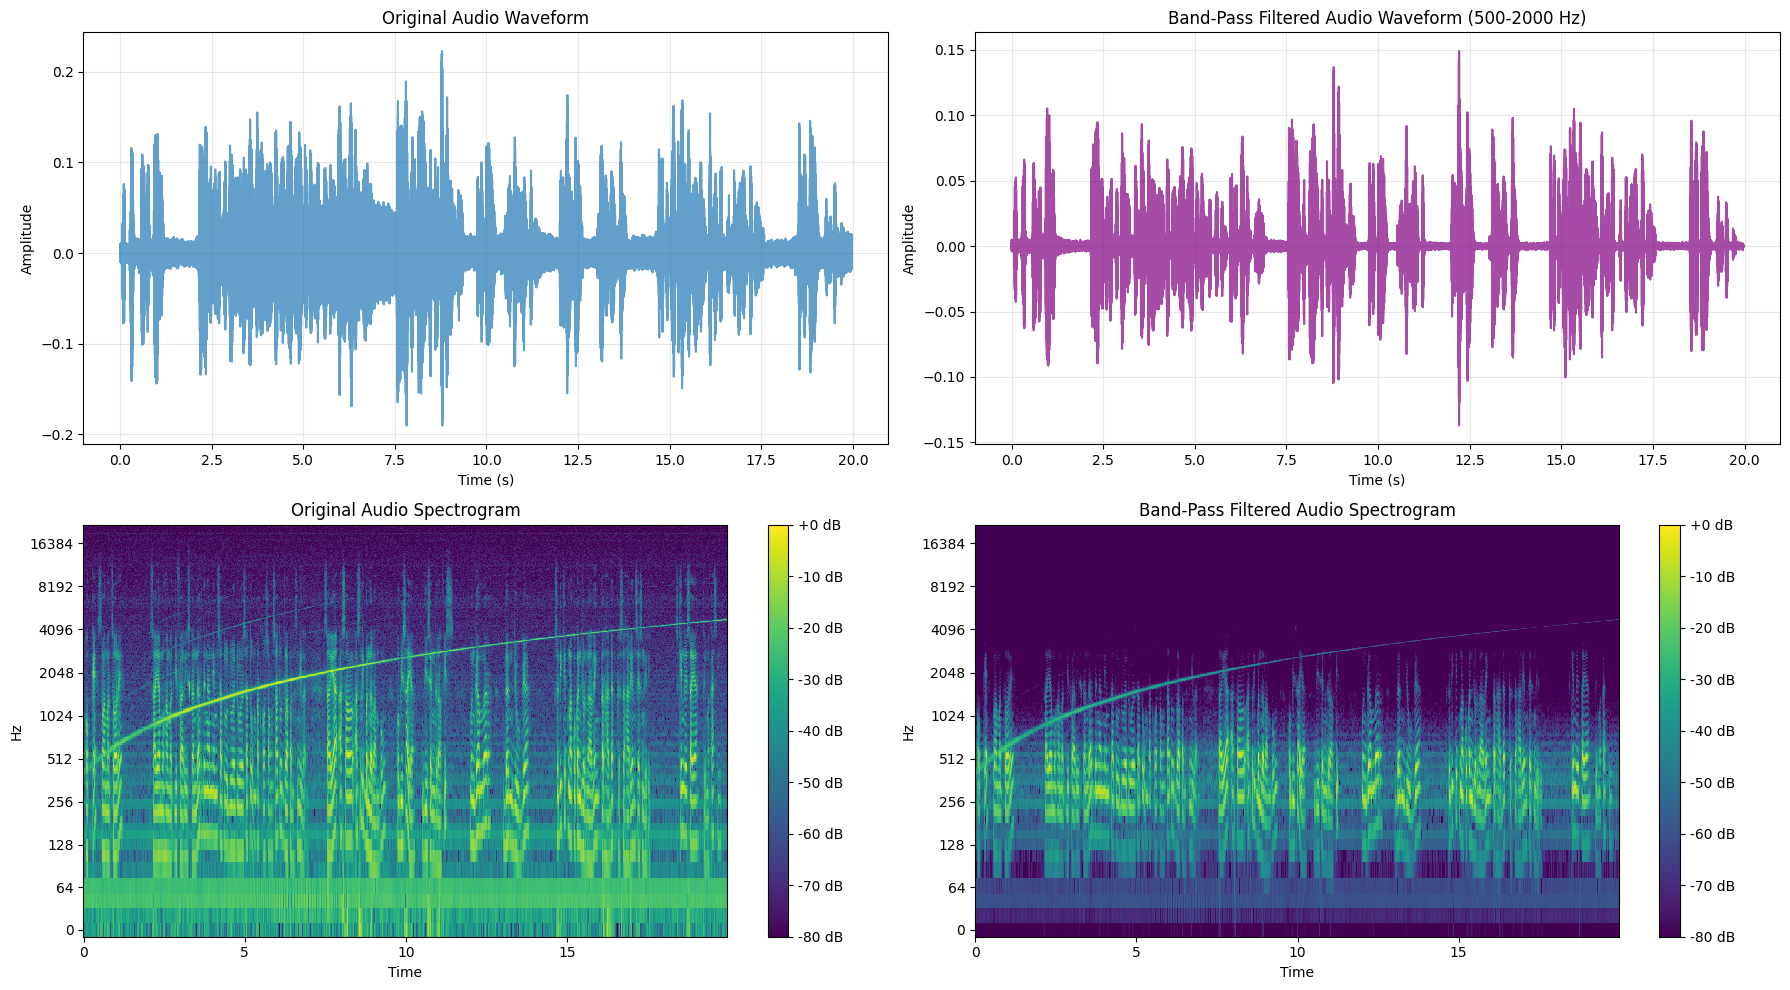

In [11]:
# Visualize the original and band-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, bpassed_audio, label='Band-Pass Filtered', color='purple', alpha=0.7)
plt.title('Band-Pass Filtered Audio Waveform (500-2000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the band-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(bpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [12]:
# Save the band-pass filtered audio
output_path = os.path.join('media_output', 'band_pass_filtered.wav')
sf.write(output_path, bpassed_audio, sr)

LibsndfileError: Error opening 'media_output\\band_pass_filtered.wav': System error.